

1.   Show the dataframe shape.
2.   Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with NaN values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

In [93]:
#Show the dataframe shape.
import pandas as pd
data= pd.read_csv("marketing_customer_analysis.csv")
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [94]:
#Standardize header names.
new_columns=[]
for i in range (len(data.columns)):
  new_columns.append(data.columns[i].lower()) #le estoy concatenando ndf al append 
new_columns

['unnamed: 0',
 'customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [95]:
data.columns=new_columns
data.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [96]:
new_dataf=pd.DataFrame(columns=new_columns)
new_dataf=pd.concat([data], axis=0)
new_dataf=new_dataf.reset_index()
new_dataf

,index,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [98]:
#Dropeamos las columnas que no son necesarias
new_dataf=new_dataf.drop(['index', 'unnamed: 0'], axis=1)

In [99]:
new_dataf

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [100]:
#Which columns are numerical?
#Which columns are categorical?
#index, unnamed, clt, income, mpa,mslc, mspi, noc, nop, tca, 
new_dataf.dtypes
#for i in data.columns: 
 # print("El % de valores faltantes de la columna", i, " es el", 100*sum(data[i].isnull()) / len(data[i]) ,"%")

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [101]:
dtypes = new_dataf.dtypes.to_dict()
for col_name, typ in dtypes.items():
  if(typ=='O'):
     print(col_name + " is categorical")
  elif(typ=='float64' or typ=='int64'):
    print(col_name + " is numerical")

customer is categorical
state is categorical
customer lifetime value is numerical
response is categorical
coverage is categorical
education is categorical
effective to date is categorical
employmentstatus is categorical
gender is categorical
income is numerical
location code is categorical
marital status is categorical
monthly premium auto is numerical
months since last claim is numerical
months since policy inception is numerical
number of open complaints is numerical
number of policies is numerical
policy type is categorical
policy is categorical
renew offer type is categorical
sales channel is categorical
total claim amount is numerical
vehicle class is categorical
vehicle size is categorical
vehicle type is categorical


In [104]:
#Check and deal with NaN values.
new_dataf.isnull().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [105]:
print("NaN")
for i in new_dataf.columns: 
  print( "El % de valores faltantes de la columna", i, " es el", 100*sum(new_dataf[i].isnull()) / len(new_dataf[i]) ,"%")


NaN
El % de valores faltantes de la columna customer  es el 0.0 %
El % de valores faltantes de la columna state  es el 5.783684692942255 %
El % de valores faltantes de la columna customer lifetime value  es el 0.0 %
El % de valores faltantes de la columna response  es el 5.783684692942255 %
El % de valores faltantes de la columna coverage  es el 0.0 %
El % de valores faltantes de la columna education  es el 0.0 %
El % de valores faltantes de la columna effective to date  es el 0.0 %
El % de valores faltantes de la columna employmentstatus  es el 0.0 %
El % de valores faltantes de la columna gender  es el 0.0 %
El % de valores faltantes de la columna income  es el 0.0 %
El % de valores faltantes de la columna location code  es el 0.0 %
El % de valores faltantes de la columna marital status  es el 0.0 %
El % de valores faltantes de la columna monthly premium auto  es el 0.0 %
El % de valores faltantes de la columna months since last claim  es el 5.802016498625115 %
El % de valores faltan

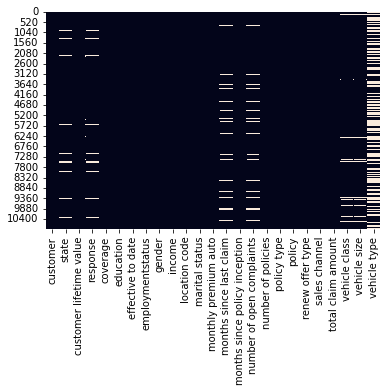

In [106]:
import seaborn as sns

# Identificamos los missing values visualmente
# Mediante este gráfico es más fácil encontrar patrones y vínculos existentes 
#entre los missing values en las diferentes variables
sns.heatmap(new_dataf.isnull(), cbar=False)

In [107]:
new_dataf=new_dataf.drop('vehicle type', axis=1)
new_dataf

#Elimino la columna vehicle type porque el porcentaje de NaNs es muy elevado, de igual forma 
# al ser una columna de tipo categorica, no es tan factible trabajar con los NaN

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [108]:
import numpy as np


In [109]:
data['state']=data['state'].fillna('F')

In [110]:
# Imputamos  'state'' con la moda
new_dataf['state'].fillna(new_dataf['state'].mode()[0], inplace=True)
print("Valores perdidos en state: " + 
      str(new_dataf['state'].isnull().sum()))

Valores perdidos en state: 0


In [111]:
# Imputamos 'response' con la moda
new_dataf['response'].fillna(new_dataf['response'].mode()[0], inplace=True)
print("Valores perdidos en response : " + 
      str(new_dataf['response'].isnull().sum()))

Valores perdidos en response : 0


In [112]:
# Imputamos 'months since last claim' con promedio porque se trata de una columna 
# de tipo numerica 
mslc_mean=np.mean(new_dataf['months since last claim'])
new_dataf['months since last claim']=new_dataf['months since last claim'].fillna(mslc_mean)


In [113]:
# Imputamos 'number of open complaints ' con promedio porque se trata de una columna 
# de tipo numerica 
noc_mean=np.mean(new_dataf['number of open complaints'])
new_dataf['number of open complaints ']=new_dataf['number of open complaints'].fillna(noc_mean)


In [114]:
# Imputamos 'vehicle class' con la moda
new_dataf['vehicle class'].fillna(new_dataf['vehicle class'].mode()[0], inplace=True)
print("Valores perdidos en vehicle class : " + 
      str(new_dataf['vehicle class'].isnull().sum()))

Valores perdidos en vehicle class : 0


In [115]:
# Imputamos  'vehicle size' con la moda
new_dataf['vehicle size'].fillna(new_dataf['vehicle size'].mode()[0], inplace=True)
print("Valores perdidos en vehicle size : " + 
      str(new_dataf['vehicle size'].isnull().sum()))

Valores perdidos en vehicle size : 0


In [116]:
#Comprobamos que ya no hay nulos 
new_dataf.isnull().sum()

customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints        633
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                      0
vehicle size                       0
number of open complaints          0
dtype: int64

In [122]:
#BONUS
def clean_data(df):
     new_dataf.columns=[e.lower().replace(' ', '_') for e in new_dataf.columns]
     new_dataf=new_dataf.drop(columns=['unnamed:_0', 'vehicle_type'])
     new_dataf=new_dataf.dropna()    
     new_dataf['effective_to_date']=pd.to_datetime(new_dataf['effective_to_date'], errors='coerce')
     return
     clean_data(new_dataf)

In [123]:
new_dataf.isnull().sum()


customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints        633
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                      0
vehicle size                       0
number of open complaints          0
dtype: int64